# UK Cities from worldcities

A look into all the UK cities in `worldcities.csv`.


In [8]:
import pandas
import matplotlib.pyplot as plt
import json

Get cities data from worldcities


In [9]:
df = pandas.pandas.read_csv("./data/worldcities/worldcities.csv", header=0)
df_uk = df[df["country"] == "United Kingdom"]
df_uk = df_uk.sort_values(by="population", ascending=False)
df_uk.head(3)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
35,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,11262000.0,1826645935
274,Birmingham,Birmingham,52.4800,-1.9025,United Kingdom,GB,GBR,Birmingham,NaN,2919600.0,1826423213
297,Manchester,Manchester,53.4794,-2.2453,United Kingdom,GB,GBR,Manchester,NaN,2705000.0,1826246335


Get cities data from uk_rings.json


In [10]:
with open("./data/uk_rings/uk_rings.json", "r", encoding="utf-8") as f:
    uk_rings = json.load(f)
cities_with_ring_data = list(uk_rings.keys())
print(cities_with_ring_data)
print("Birmingham...")
print(uk_rings["Birmingham"])

['London', 'Birmingham', 'Manchester', 'Liverpool', 'Portsmouth', 'Southampton', 'Leeds', 'Nottingham', 'Glasgow', 'Bristol', 'Sheffield', 'Leicester', 'Edinburgh', 'Caerdydd', 'Worthing', 'Stoke-on-Trent', 'Coventry', 'Reading', 'Belfast', 'Kingston upon Hull']
Birmingham...
{'distances': [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], 'populations': [2706341, 2602645, 2486519, 2362338, 2251418, 2119190, 2004800, 1893441, 1753948, 1586911, 1416102, 1239122, 1034281, 832626, 631351, 460386, 302135, 158969, 65344, 13730, 0], 'busStops': [11278, 10715, 10232, 9701, 9096, 8546, 7962, 7367, 6648, 5892, 5172, 4506, 3658, 2804, 2089, 1519, 1053, 715, 418, 166, 0], 'tramStops': [68, 68, 65, 65, 63, 59, 57, 55, 52, 46, 46, 44, 40, 36, 32, 30, 28, 26, 24, 18, 0], 'railStops': [79, 76, 74, 70, 67, 64, 58, 56, 49, 45, 39, 36, 32, 27, 22, 16, 12, 7, 6, 3, 0]}


Add ring population data to cities


In [11]:
def get_ring_pop(city, radius_km):
    city = uk_rings.get(city, None)
    if city is None:
        return None
    index = city["distances"].index(radius_km)
    if index == -1:
        return None
    return city["populations"][index]


# add column for population within 10km
df_uk["pop<5km"] = df_uk["city_ascii"].apply(lambda city: get_ring_pop(city, 5))
df_uk["pop<10km"] = df_uk["city_ascii"].apply(lambda city: get_ring_pop(city, 10))
df_uk["pop<20km"] = df_uk["city_ascii"].apply(lambda city: get_ring_pop(city, 20))
df_uk.head(3)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,pop<5km,pop<10km,pop<20km
35,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,11262000.0,1826645935,1023965.0,3674801.0,8999480.0
274,Birmingham,Birmingham,52.4800,-1.9025,United Kingdom,GB,GBR,Birmingham,NaN,2919600.0,1826423213,460386.0,1416102.0,2706341.0
297,Manchester,Manchester,53.4794,-2.2453,United Kingdom,GB,GBR,Manchester,NaN,2705000.0,1826246335,433527.0,1243302.0,2756259.0


Plot


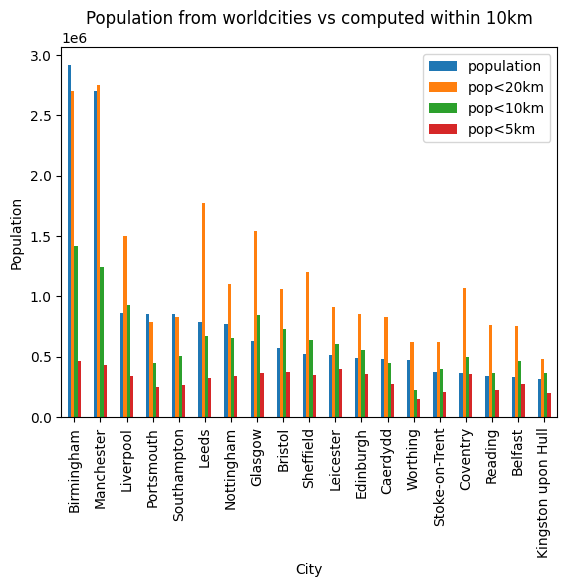

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
SHOW_N = 19
df_uk.head(SHOW_N + 1).tail(SHOW_N).plot.bar(
    x="city_ascii", y=["population", "pop<20km", "pop<10km", "pop<5km"], ax=ax
)
ax.set_ylabel("Population")
ax.set_xlabel("City")
ax.set_title("Population from worldcities vs computed within 10km")
plt.show()